**The cell below loads the CSV file of the sensor data into a Pandas Dataframe** 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a pandas DataFrame
csv_file_path = 'feeds (2).csv'

# Read only specific columns from the CSV file
columns_to_read = ['Timestamp', 'EC', 'pH', 'Humidity', 'Air_Temp', 'Water_Temp', 'CO2']
df = pd.read_csv(csv_file_path, usecols=columns_to_read)

# Giving a summary of the data loaded into the Pandas Dataframe
df.describe()

,EC,pH,Humidity,Air_Temp,Water_Temp,CO2
count,91384.000000,91384.000000,91384.000000,91384.000000,91384.000000,91264.000000
mean,1040.369438,8.249649,99.074411,24.848521,21.520355,1629.713896
std,3291.609503,30.575837,2.172574,1.457692,3.366101,924.844395
min,0.000000,0.000000,85.400000,21.300000,6.250000,0.000000
25%,992.200000,6.590000,99.900000,24.000000,18.810000,1132.000000
50%,1015.000000,6.660000,99.900000,24.900000,23.120000,1979.000000
75%,1066.000000,6.710000,99.900000,26.000000,24.120000,2018.000000
max,994994.930000,1212.580000,99.900000,28.600000,26.250000,5000.000000


**The cell below cleans the data and applies filters to the sensor data to remove anomalies i.e. parsing errors leading to absurdly large or small values** 

**The cell below generates histograms for the columns of sensor data to represent the distribution of all the values** 

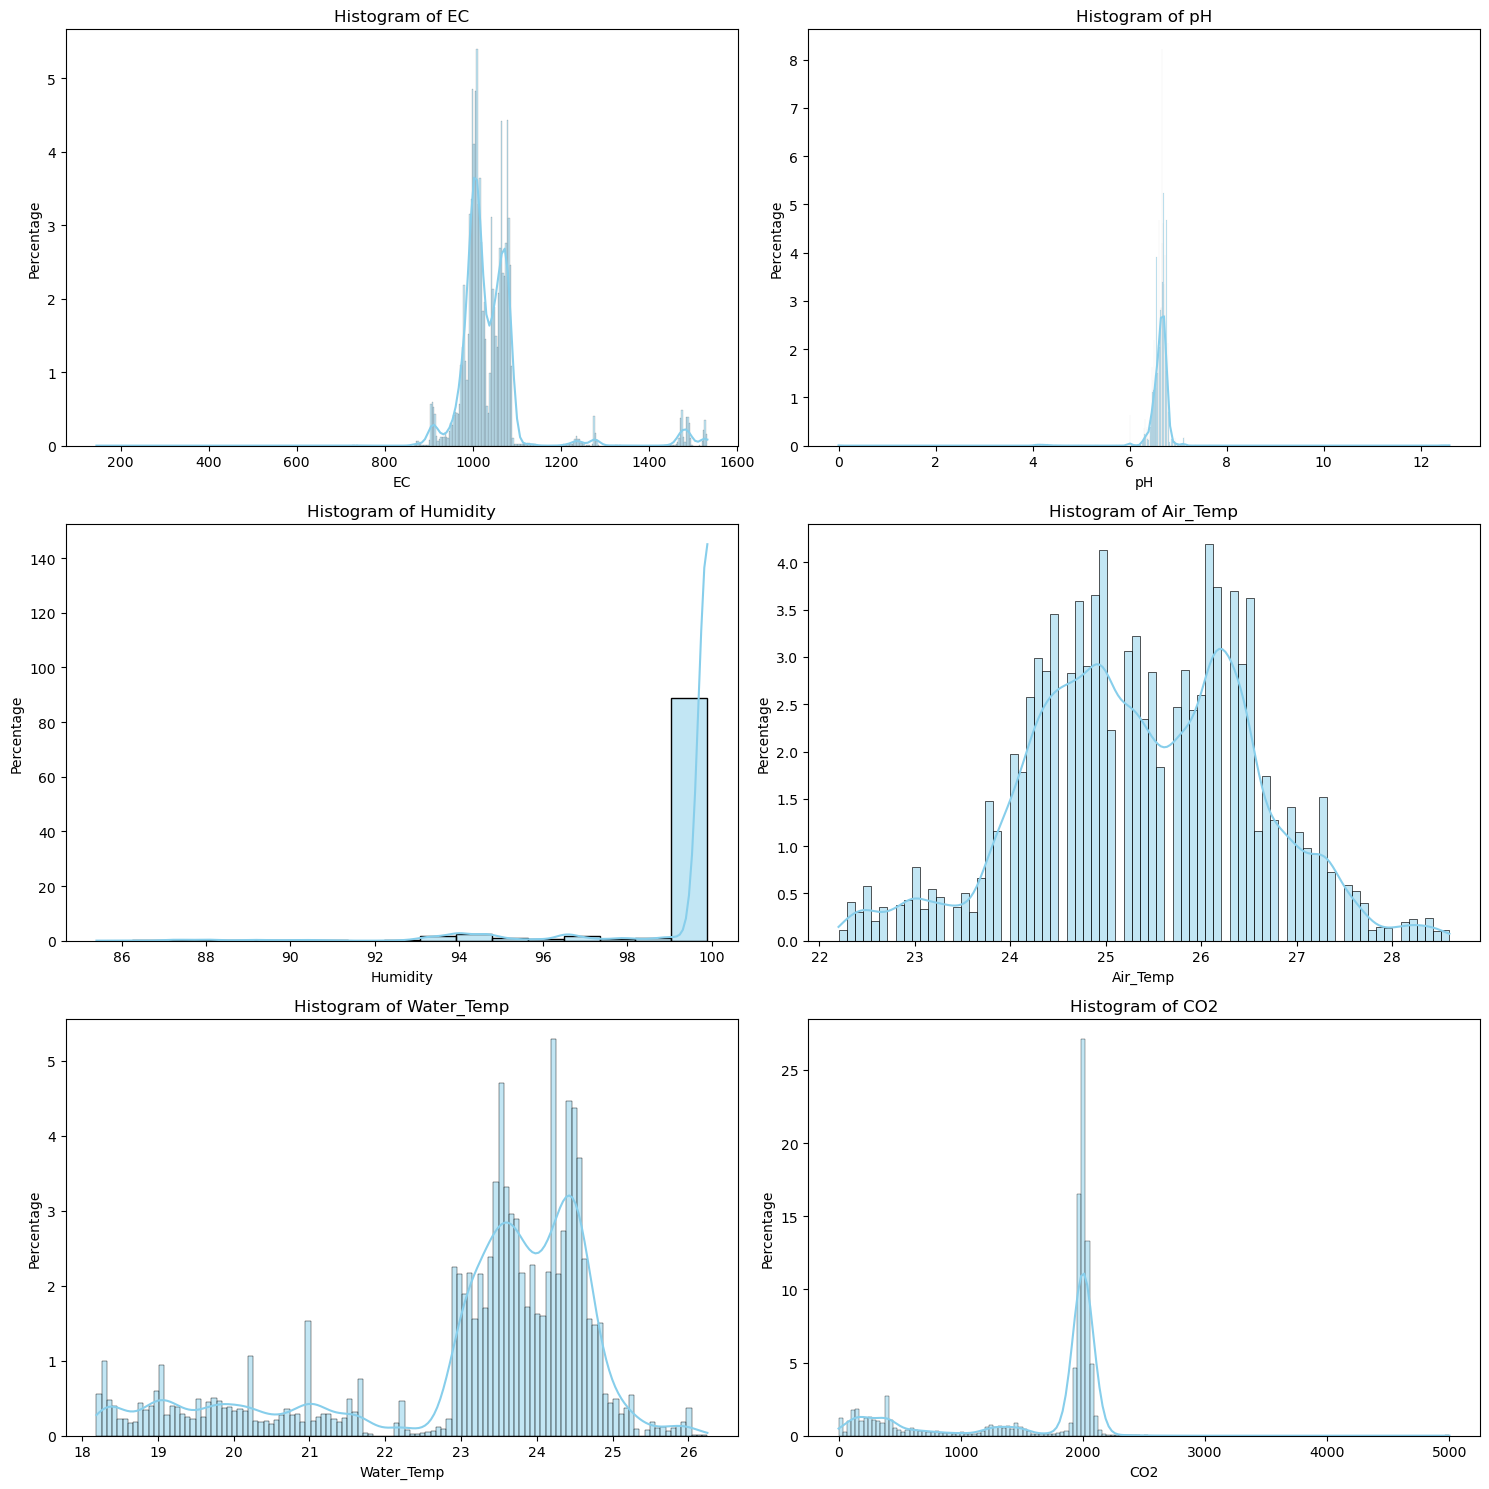

CPU times: total: 12.1 s
Wall time: 8.58 s


,EC,pH,Humidity,Air_Temp,Water_Temp,CO2
count,62048.000000,62048.000000,62048.000000,62048.000000,62048.000000,62048.000000
mean,1043.398097,6.619913,99.316097,25.366930,23.146833,1597.467573
std,95.730889,0.406160,1.876290,1.162011,1.781595,690.878201
min,145.000000,0.000000,85.400000,22.200000,18.190000,0.000000
25%,1001.000000,6.560000,99.900000,24.500000,23.000000,1335.000000
50%,1021.000000,6.660000,99.900000,25.300000,23.690000,1983.000000
75%,1066.000000,6.710000,99.900000,26.200000,24.370000,2013.000000
max,1533.000000,12.590000,99.900000,28.600000,26.250000,5000.000000


In [12]:
%%time

# Plot histograms for each column except the first one
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Start the loop from the second column
for i, column in enumerate(df.columns[1:]):
    # Choose the color for the histogram bars
    color = 'skyblue'
    
    # Plot histogram with stat='percent' to show percentages
    sns.histplot(df[column], kde=True, color=color, ax=axes[i//2, i%2], bins='auto', stat='percent')
    
    # Set labels and title
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Percentage')
    axes[i//2, i%2].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Giving a summary of the data after data cleaning and filtering
df.describe()